# Number Recognition

#### importing all necessary libraries

In [27]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np


#### Loading and preprocessing the MNIST dataset

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values to the range [0, 1]
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=10)

In [29]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

#### Compile the model

In [30]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Train the model

In [31]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 3s 2ms/step - loss: 0.2898 - accuracy: 0.9161 - val_loss: 0.1233 - val_accuracy: 0.9645
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.1228 - accuracy: 0.9632 - val_loss: 0.0904 - val_accuracy: 0.9740
Epoch 3/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0826 - accuracy: 0.9749 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0629 - accuracy: 0.9810 - val_loss: 0.0837 - val_accuracy: 0.9775
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0838 - val_accuracy: 0.9780


#### Evaluate the model

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


#### Save the trained model

In [33]:
model.save('handwritten_digit_model.keras')

1/1 [==============================] - 0s 16ms/step


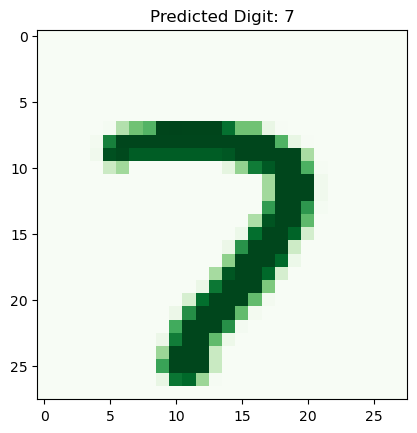

In [37]:

# Function to predict digit from an image
def predict_digit(image):
    image = np.expand_dims(image, axis=0)  
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)
    return predicted_digit


# Generate a random image index for prediction
image_index = np.random.randint(0, len(x_test))  # Random index between 0 and number of test images
sample_image = x_test[image_index]
predicted_digit = predict_digit(sample_image)

plt.imshow(sample_image, cmap='Greens')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()
